In [1]:
import autograd.numpy as np
from autograd import grad
from autograd.numpy import log, sqrt, sin, cos, exp, pi, prod
from autograd.numpy.random import normal, uniform

import matplotlib as mpl
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import scipy.stats
from tqdm import tqdm

In [3]:
from tools import Helper, Sampler
from data import Polygon, Heart, Cross, Star

In [4]:
np.set_printoptions(precision=3)
np.set_printoptions(suppress=True)
np.random.seed(9)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


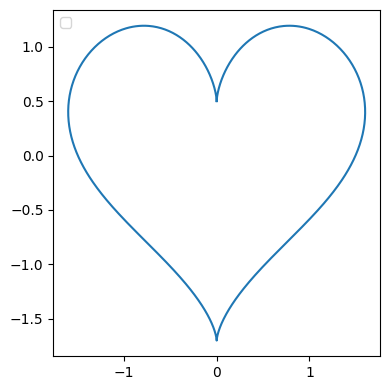

In [5]:
myHeart = Heart()

points = myHeart.position(np.arange(0, 1, 0.001))
    
fig = plt.figure(figsize=(4, 4))
# plt.yticks([-4, -2, 0, 2, 4]) 
plt.plot(points[0, :], points[1, :])
plt.legend(loc="upper left", prop={'size': 10})
plt.tight_layout()
#plt.grid()
plt.show()

In [6]:
myHelper = Helper(Heart, grid_radius=1e-2, grid_curve=1e-3)

 10%|████████████▌                                                                                                                   | 9859/100001 [00:04<00:36, 2496.80it/s]

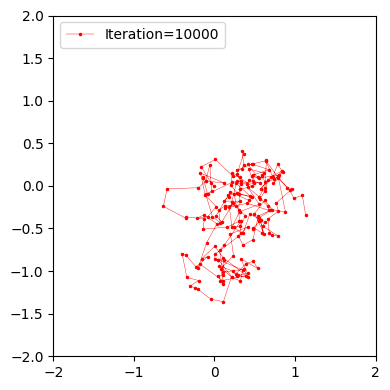

 20%|█████████████████████████▎                                                                                                     | 19897/100001 [00:09<00:40, 1968.53it/s]

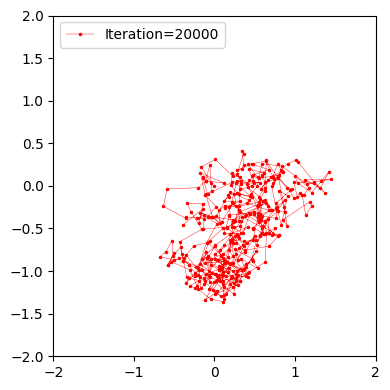

 30%|█████████████████████████████████████▉                                                                                         | 29921/100001 [00:14<00:39, 1754.89it/s]

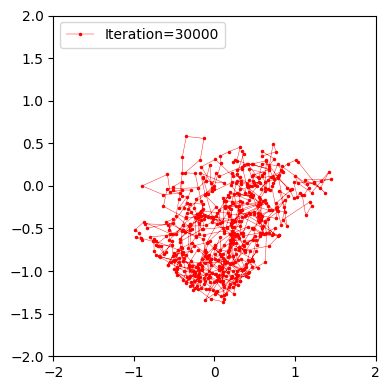

 40%|██████████████████████████████████████████████████▋                                                                            | 39926/100001 [00:19<00:27, 2181.84it/s]

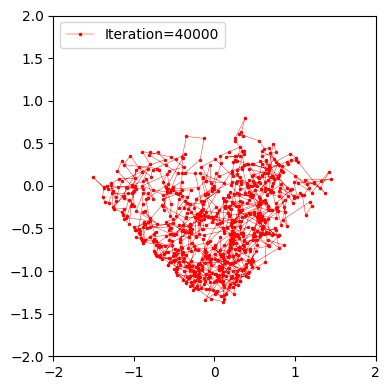

 50%|███████████████████████████████████████████████████████████████▎                                                               | 49839/100001 [00:24<00:26, 1929.15it/s]

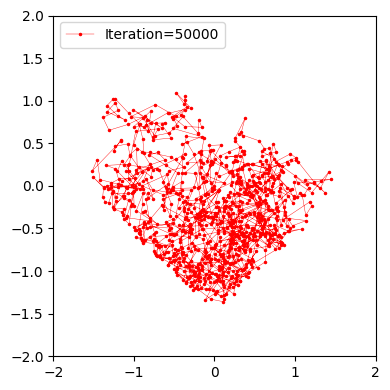

 60%|████████████████████████████████████████████████████████████████████████████▏                                                  | 59976/100001 [00:29<00:17, 2327.18it/s]

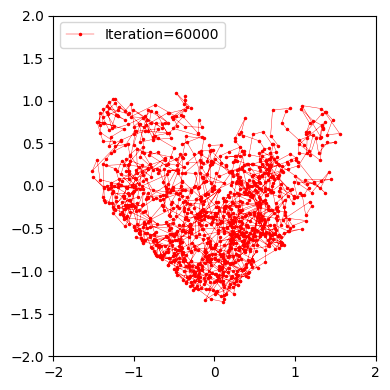

 70%|████████████████████████████████████████████████████████████████████████████████████████▋                                      | 69852/100001 [00:34<00:11, 2641.42it/s]

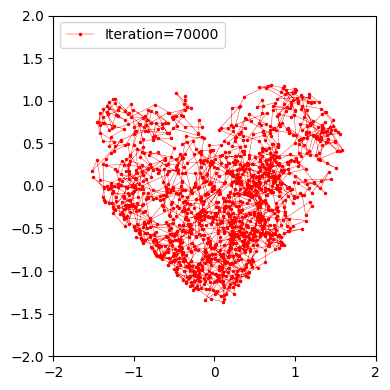

 80%|█████████████████████████████████████████████████████████████████████████████████████████████████████▌                         | 79989/100001 [00:39<00:09, 2120.72it/s]

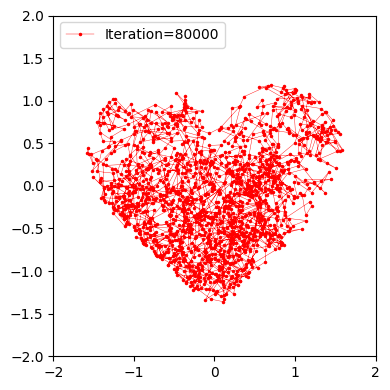

 90%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉             | 89729/100001 [00:44<00:03, 2604.28it/s]

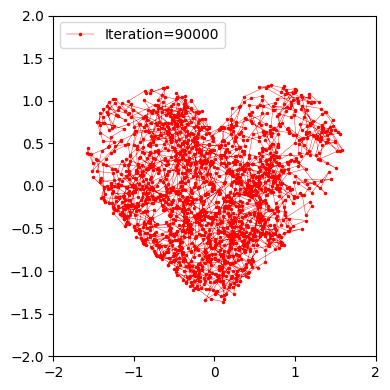

100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉| 99980/100001 [00:49<00:00, 1761.69it/s]

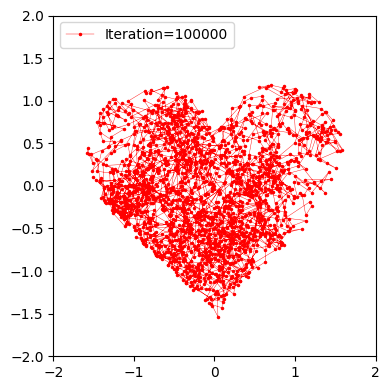

100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 100001/100001 [00:49<00:00, 2016.96it/s]


In [7]:
boundary_ = 2
sampler = Sampler(myHelper, boundary=boundary_, xinit=[0.,0.], lr=1e-4, T=2)
warm_up = 0
for iters in tqdm(range(int(1e5)+1)):
    sampler.rgld_step(iters)
    if iters > warm_up:
        if iters % 10000 == 0:
            fig = plt.figure(figsize=(4, 4))
            plt.plot(sampler.list[0, :], sampler.list[1, :], \
                     linewidth=0.3, marker='.', markersize=3, color='r', label="Iteration="+str(iters)) 
            plt.legend(loc="upper left", prop={'size': 10})
            plt.xlim([-boundary_, boundary_])
            plt.ylim([-boundary_, boundary_])
            plt.tight_layout()
            plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


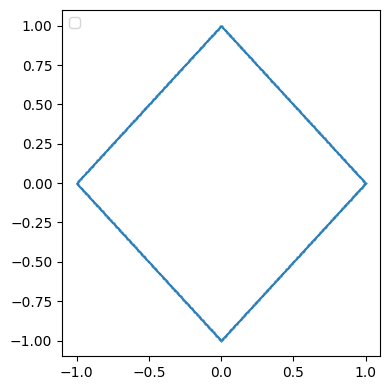

In [8]:
myPolygon = Polygon(corners=4)

points = myPolygon.position(np.arange(0, 1, 0.001))

fig = plt.figure(figsize=(4, 4))
plt.plot(points[0, :], points[1, :], 'o', markersize=0.5)
plt.legend(loc="upper left", prop={'size': 10})
plt.tight_layout()
plt.show()

In [9]:
myHelper = Helper(Polygon)

 50%|███████████████████████████████████████████████████████████████▊                                                                | 49829/100000 [00:40<01:04, 781.09it/s]

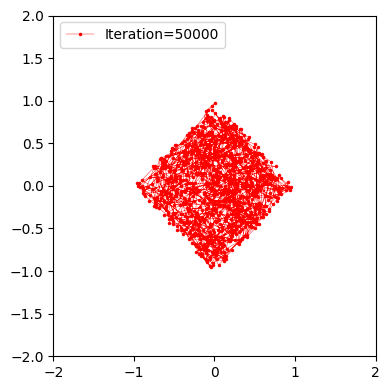

100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 100000/100000 [01:19<00:00, 1252.74it/s]


In [10]:
boundary_ = 2
sampler = Sampler(myHelper, boundary=boundary_, xinit=[0.,0.], lr=3e-4, T=2)
warm_up = 0
for iters in tqdm(range(int(1e5))):
    sampler.rgld_step(iters)
    if iters > warm_up:
        if iters % 50000 == 0:
            fig = plt.figure(figsize=(4, 4))
            plt.plot(sampler.list[0, :], sampler.list[1, :], \
                     linewidth=0.3, marker='.', markersize=3, color='r', label="Iteration="+str(iters)) 
            plt.legend(loc="upper left", prop={'size': 10})
            plt.xlim([-boundary_, boundary_])
            plt.ylim([-boundary_, boundary_])
            plt.tight_layout()
            plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


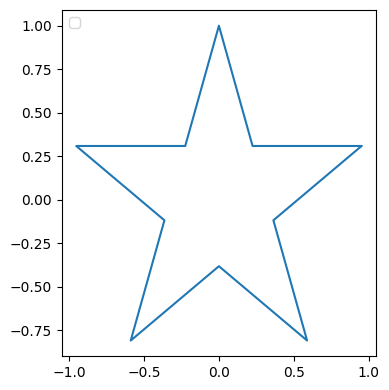

In [11]:
myClass = Star()

points = myClass.position(np.arange(0, 1, 0.001))

fig = plt.figure(figsize=(4, 4))
plt.plot(points[0, :], points[1, :])
plt.legend(loc="upper left", prop={'size': 10})
plt.tight_layout()
plt.show()

In [12]:
myHelper = Helper(Star, grid_radius=1e-2, grid_curve=1e-3)

 10%|████████████▉                                                                                                                    | 9985/100001 [00:09<02:16, 661.20it/s]

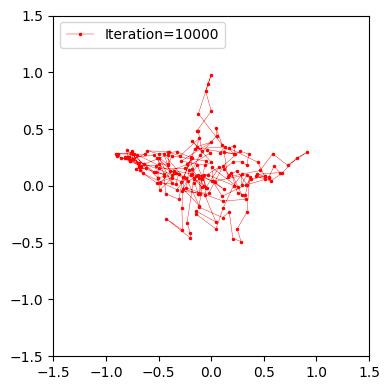

 20%|█████████████████████████▎                                                                                                     | 19923/100001 [00:18<00:43, 1830.59it/s]

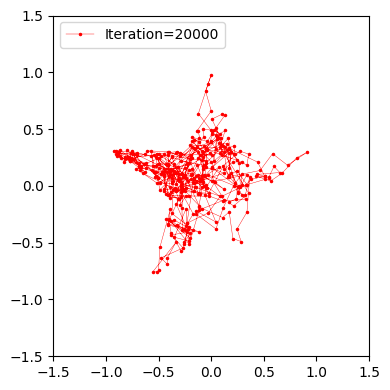

 30%|█████████████████████████████████████▉                                                                                         | 29848/100001 [00:26<00:45, 1533.12it/s]

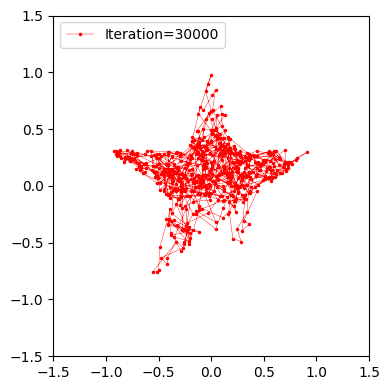

 40%|███████████████████████████████████████████████████▏                                                                            | 39957/100001 [00:36<01:16, 780.10it/s]

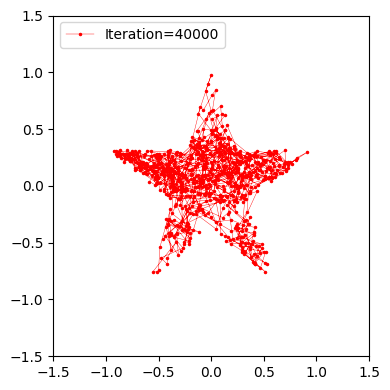

 50%|███████████████████████████████████████████████████████████████▉                                                                | 49992/100001 [00:46<01:15, 665.78it/s]

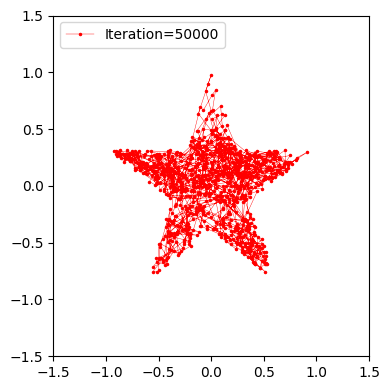

 60%|████████████████████████████████████████████████████████████████████████████▏                                                  | 59971/100001 [00:56<00:22, 1785.71it/s]

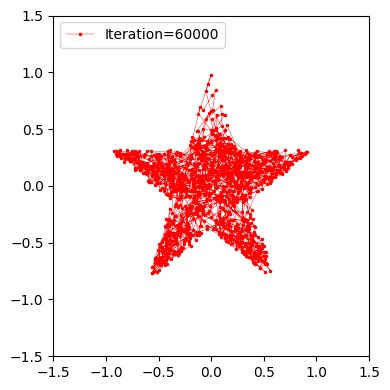

 70%|████████████████████████████████████████████████████████████████████████████████████████▊                                      | 69945/100001 [01:07<00:16, 1789.51it/s]

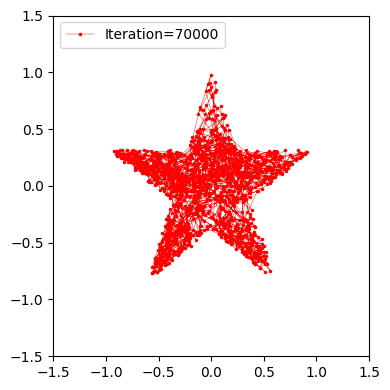

 80%|██████████████████████████████████████████████████████████████████████████████████████████████████████▎                         | 79909/100001 [01:16<00:21, 935.53it/s]

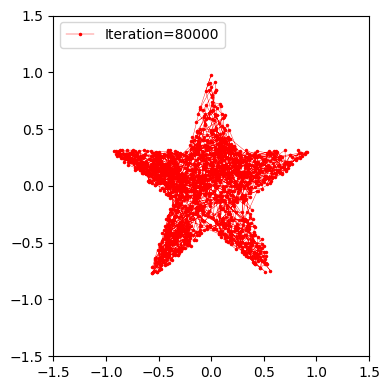

 90%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏            | 89873/100001 [01:25<00:08, 1263.32it/s]

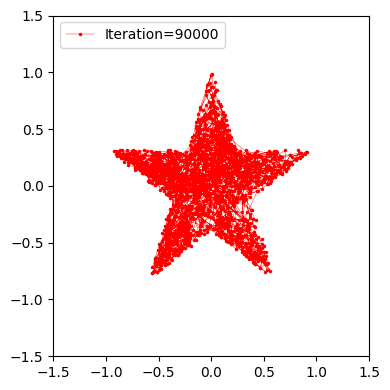

100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉| 99943/100001 [01:34<00:00, 1216.74it/s]

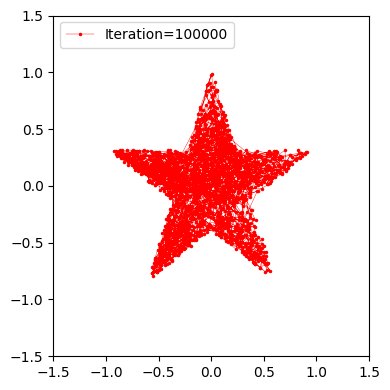

100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 100001/100001 [01:34<00:00, 1056.29it/s]


In [13]:
boundary_ = 1.5
sampler = Sampler(myHelper, boundary=boundary_, xinit=[0.,0.], lr=1e-4, T=2)
warm_up = 0
for iters in tqdm(range(int(1e5)+1)):
    sampler.rgld_step(iters)
    if iters > warm_up:
        if iters % 10000 == 0:
            fig = plt.figure(figsize=(4, 4))
            plt.plot(sampler.list[0, :], sampler.list[1, :], \
                     linewidth=0.3, marker='.', markersize=3, color='r', label="Iteration="+str(iters)) 
            plt.legend(loc="upper left", prop={'size': 10})
            plt.xlim([-boundary_, boundary_])
            plt.ylim([-boundary_, boundary_])
            plt.tight_layout()
            plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


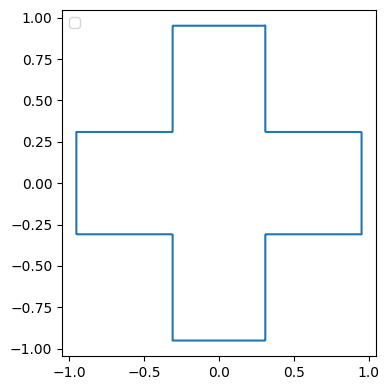

In [14]:
myClass = Cross()

points = myClass.position(np.arange(0, 1, 0.001))
    
fig = plt.figure(figsize=(4, 4))
plt.plot(points[0, :], points[1, :])
plt.legend(loc="upper left", prop={'size': 10})
plt.tight_layout()
plt.show()

In [15]:
myHelper = Helper(Cross, grid_radius=3e-3, grid_curve=3e-4)

 10%|████████████▉                                                                                                                    | 9984/100001 [02:02<08:09, 183.72it/s]

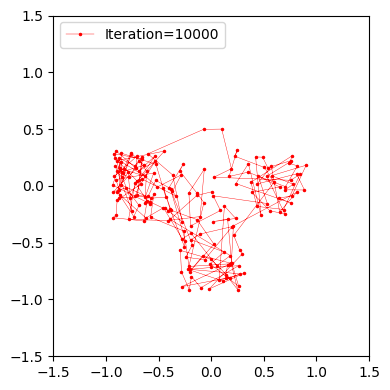

 20%|█████████████████████████▊                                                                                                       | 19996/100001 [04:00<23:59, 55.59it/s]

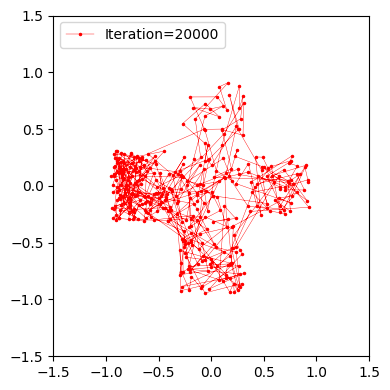

 30%|██████████████████████████████████████▍                                                                                         | 29993/100001 [06:01<09:50, 118.49it/s]

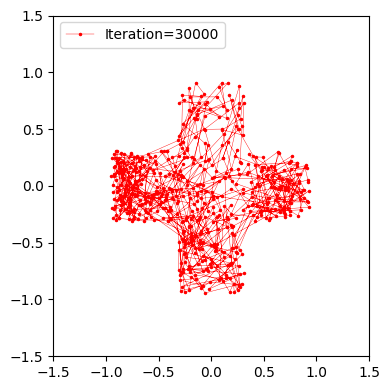

 40%|███████████████████████████████████████████████████▏                                                                            | 40000/100001 [07:45<09:18, 107.38it/s]

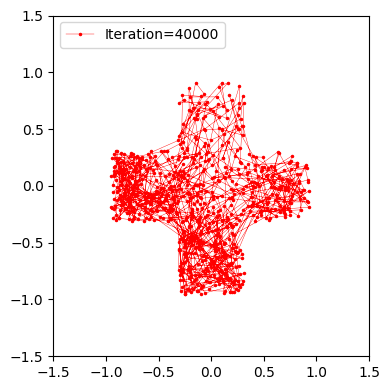

 50%|████████████████████████████████████████████████████████████████▍                                                                | 49995/100001 [09:37<15:28, 53.85it/s]

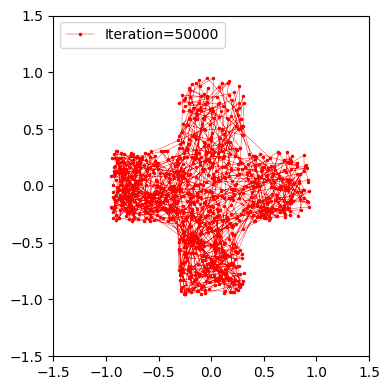

 60%|█████████████████████████████████████████████████████████████████████████████▍                                                   | 59991/100001 [11:29<07:04, 94.17it/s]

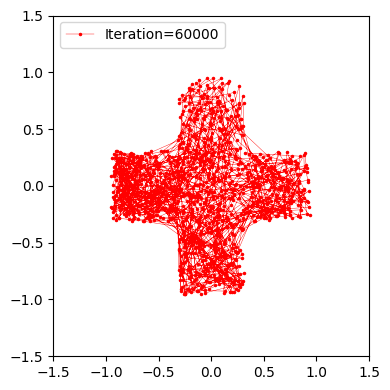

 70%|█████████████████████████████████████████████████████████████████████████████████████████▌                                      | 69993/100001 [13:14<02:34, 194.40it/s]

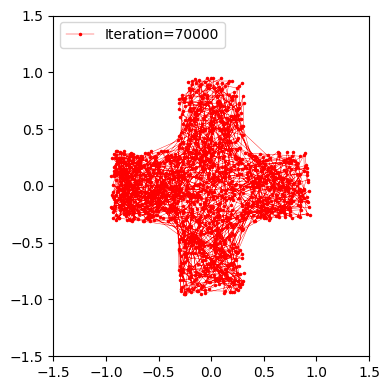

 80%|██████████████████████████████████████████████████████████████████████████████████████████████████████▍                         | 79995/100001 [14:54<02:10, 153.62it/s]

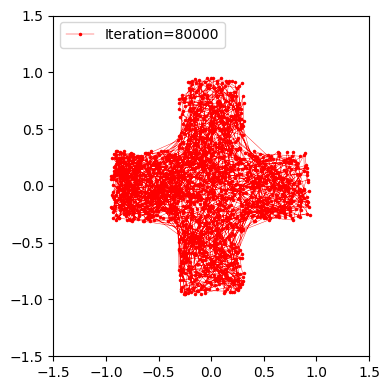

 90%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████             | 89986/100001 [16:50<02:03, 81.17it/s]

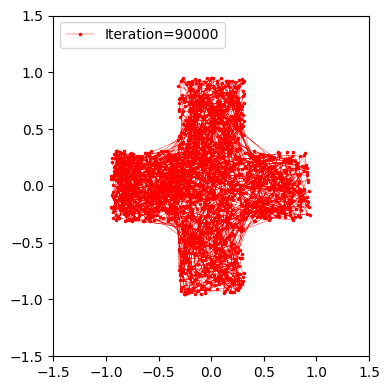

100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉| 99994/100001 [18:33<00:00, 176.64it/s]

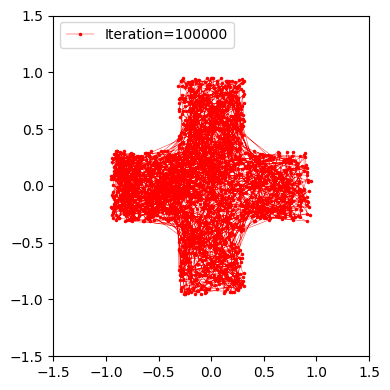

100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 100001/100001 [18:33<00:00, 89.81it/s]


In [16]:
boundary_ = 1.5
sampler = Sampler(myHelper, boundary=boundary_, xinit=[0.,0.], lr=3e-4, T=2)
warm_up = 0
for iters in tqdm(range(int(1e5)+1)):
    sampler.rgld_step(iters)
    if iters > warm_up:
        if iters % 10000 == 0:
            fig = plt.figure(figsize=(4, 4))
            plt.plot(sampler.list[0, :], sampler.list[1, :], \
                     linewidth=0.3, marker='.', markersize=3, color='r', label="Iteration="+str(iters)) 
            plt.legend(loc="upper left", prop={'size': 10})
            plt.xlim([-boundary_, boundary_])
            plt.ylim([-boundary_, boundary_])
            plt.tight_layout()
            plt.show()